<a href="https://colab.research.google.com/github/pshyshko/ExpFraud/blob/master/Pavel_Shyshko_189969_SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import tensorflow as tf
import random
import os

import numpy as np

seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Zbiór danych**

Ten zestaw danych zawiera informacje o płatnościach zaległych, czynniki demograficzne, dane kredytowe, historię płatności oraz wyciągi z rachunków klientów kart kredytowych na Tajwanie od kwietnia 2005 do września 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

25 zmiennych:

1. ID: Identyfikator każdego klienta.
2. LIMIT_BAL: Kwota udzielonego kredytu w dolarach NT (obejmuje kredyt indywidualny i rodzinny/uzupełniający).
3. SEX: Płeć (1=mężczyzna, 2=kobieta)
4. EDUCATION: (1=szkole wyższe, 2=uniwersytet, 3=szkole średnie, 4=inne, 5=nieznane, 6=nieznane)
5. MARRIAGE: Stan cywilny (1=małżeński, 2=samotny, 3=inne)
6. AGE: Wiek w latach
7. PAY_0: Status spłaty we wrześniu 2005 r. (-1=płacić należycie, 1=opóźnienie w płatności za jeden miesiąc, 2=opóźnienie w płatności za dwa miesiące, ... 8=opóźnienie w płatności za osiem miesięcy, 9=opóźnienie w płatności za dziewięć miesięcy i więcej)
8. PAY_2: Status spłaty w sierpniu 2005 r. (skala taka sama jak powyżej)
9. PAY_3: Status spłaty w lipcu 2005 r. (skala taka sama jak powyżej)
10. PAY_4: Status spłaty w czerwcu 2005 r. (skala taka sama jak powyżej)
11. PAY_5: Status spłaty w maju 2005 r. (skala taka sama jak powyżej)
12. PAY_6: Status spłaty w kwietniu 2005 r. (skala taka sama jak powyżej)
13. BILL_AMT1: Zestawienie kwoty weksli we wrześniu 2005 r. (dolar NT)
14. BILL_AMT2: Zestawienie kwoty weksli w sierpniu 2005 r. (dolar NT)
15. BILL_AMT3: Zestawienie kwoty weksli w lipcu 2005 r. (dolar NT)
16. BILL_AMT4: Zestawienie kwoty weksli w czerwcu 2005 r. (dolar NT)
17. BILL_AMT5: Zestawienie kwoty weksli w maju 2005 r. (dolar NT)
18. BILL_AMT6: Zestawienie kwoty weksli w kwietniu 2005 r. (dolar NT)
19. PAY_AMT1: Kwota poprzedniej płatności we wrześniu 2005 r. (NT dolarów)
20. PAY_AMT2: Kwota poprzedniej płatności w sierpniu 2005 r. (NT dolarów)
21. PAY_AMT3: Kwota poprzedniej płatności w lipcu 2005 r. (NT dolarów)
22. PAY_AMT4: Kwota poprzedniej płatności w czerwcu 2005 r. (NT dolarów
23. PAY_AMT5: Kwota poprzedniej płatności w maju 2005 r. (NT dolarów)
24. PAY_AMT6: Kwota poprzedniej płatności w kwietniu 2005 r. (NT dolarów)
25. default.payment.next.month: Płatność domyślna (1=tak, 0=nie)

In [244]:
df = pd.read_excel('/content/drive/MyDrive/dataset/bank/default_credit_card.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [245]:
df = df.drop(['ID'], axis=1)
df = df.rename(columns={'default payment next month': 'target'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **1. Eksploracja danych**

In [246]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [247]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Musimy sprawdzić, czy tablica zawiera wartość null

In [248]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

Zanim zaczniemy badać dane, możemy użyć prostego modelu, aby zobaczyć, jaki byłby przybliżony wynik dokładności jest dla danych pierwotnych.

In [249]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value) 

In [250]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Przybliżone wyniki dla danych pierwotnych z wykorzystaniem lasu losowego.

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ' + str(round(accuracy_score(y_test, y_pred), 2)))
print('F1 score: ' + str(round(f1_score(y_true = y_test, y_pred = y_pred), 2)))
print('AUC score: ' + str(round(roc_auc_score(y_test, y_pred), 2)))

Accuracy: 0.82
F1 score: 0.48
AUC score: 0.66


Macierz błędów

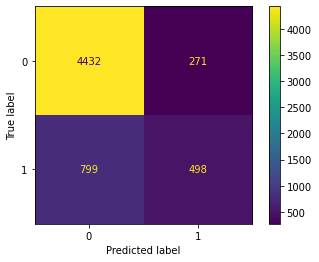

In [252]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

Musimy sprawdzić, które zmienne miały jak największy wpływ na model. Pozwoli to albo zmodyfikować dane, albo usunąć wiersze, które nie mają dużego wpływu na wynik.

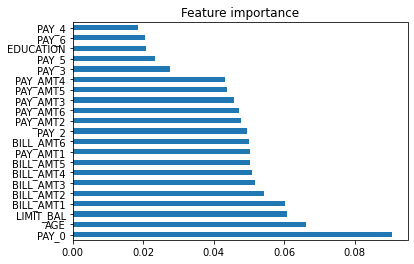

In [253]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.title('Feature importance')
plt.show()

Tworzenie macierzy korelacji i sprawdzenie, czy są jakieś zmienne, które mogą być usunięte z powodu wysokiej korelacji.

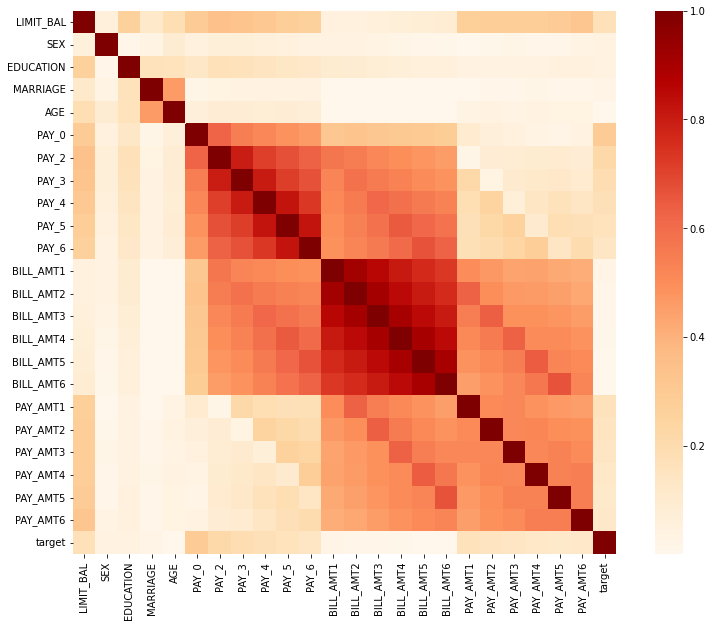

In [254]:
correlation_matrix = df.corr(method = "spearman").abs()

fig = plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap='OrRd', square=True)
plt.show()

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

Jak widać atrybuty BILL_AMT mają bardzo wysoką korelację (90 > ), co oznacza, że mogłyby zostać połączone lub usunięte do jednej instancji, ale ponieważ nasz zbiór danych nie zawiera zbyt wielu atrybutów i nie wpływa to znacząco na czas treningu sieci, można je zostawić tak jak są. 

In [255]:
to_drop

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

Dane kategorialne

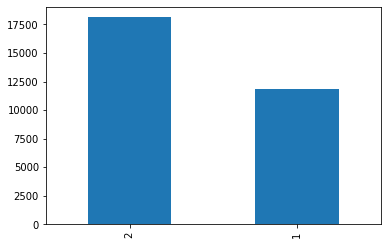

In [256]:
df.SEX.value_counts().plot(kind='bar')

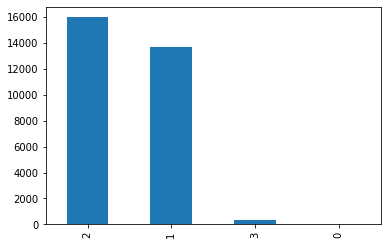

In [257]:
df.MARRIAGE.value_counts().plot(kind='bar')

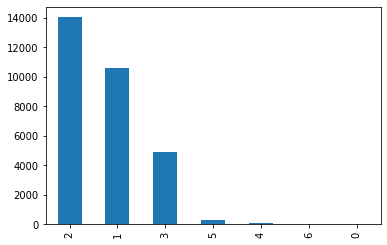

In [258]:
df.EDUCATION.value_counts().plot(kind = "bar")

Dane numeryczne

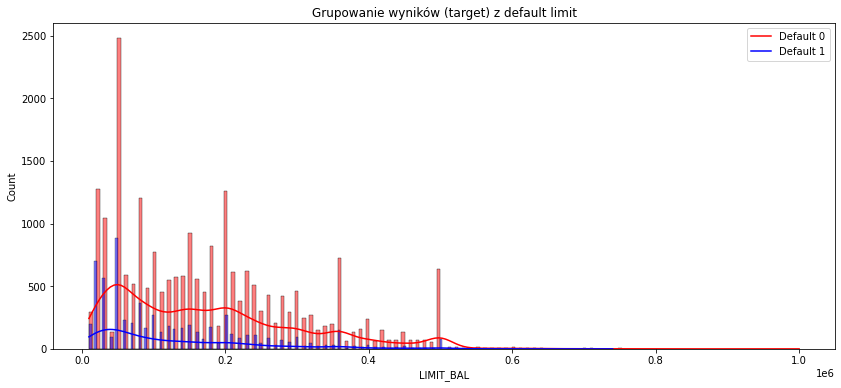

In [259]:
class_0 = df.loc[df['target'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['target'] == 1]["LIMIT_BAL"]

fig = plt.figure(figsize = (14,6))
plt.title('Grupowanie wyników (target) z default limit')

sns.set_color_codes("pastel")
sns.histplot(class_0,kde=True, bins=200, color="red")
sns.histplot(class_1,kde=True, bins=200, color="blue")
plt.legend(labels=['Default 0','Default 1'])

plt.show()

In [260]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 2. **Inżynieria cech**

Rozdzielenie zbioru danych na testowy i treningowy, jak również tworzenie nowych zmiennych

In [261]:
df = df.fillna(0)
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

In [262]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X))
scaled_data.columns = X.columns
X = scaled_data
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


1. Tworzenie nowej zmiennej porządkującej wiek na sześć kategorii i przekształcanie w zmienne kategorialne.

In [264]:
df['AGE_KA'] = 0 
df.loc[(df['AGE'] < 30) , 'AGE_KA'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AGE_KA'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AGE_KA'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AGE_KA'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AGE_KA'] = 5
df.loc[(df['AGE'] >= 70) , 'AGE_KA'] = 6

2. Tworzenie nowej zmiennej porządkującej limit na sześć kategorii i przekształcanie w zmienne kategorialne.

In [265]:
df['LIMIT_BAL_EDU'] = 0 
df.loc[(df['LIMIT_BAL'] < 200000) , 'LIMIT_BAL_EDU'] = 1
df.loc[((df['LIMIT_BAL'] >= 200000) & (df['LIMIT_BAL'] < 400000)) , 'LIMIT_BAL_EDU'] = 2
df.loc[((df['LIMIT_BAL'] >= 400000) & (df['LIMIT_BAL'] < 600000)) , 'LIMIT_BAL_EDU'] = 3
df.loc[((df['LIMIT_BAL'] >= 600000) & (df['LIMIT_BAL'] < 800000)) , 'LIMIT_BAL_EDU'] = 4
df.loc[((df['LIMIT_BAL'] >= 800000) & (df['LIMIT_BAL'] < 1000000)) , 'LIMIT_BAL_EDU'] = 5
df.loc[(df['LIMIT_BAL'] >= 1000000) , 'LIMIT_BAL_EDU'] = 6

3. Zmniejszenie liczby nieznanych zmiennych (4, 5, 6) edukacyjnych do jednej zmiennej, że początkowo jest ich 3 (1=szkole wyższe, 2=uniwersytet, 3=szkole średnie, 4=inne, 5=nieznane, 6=nieznane)

In [266]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,4)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,4)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(5,4)

4. Utwórzie nową zmienną kategoryczną z 6 grup, do których należą:


*   1 Żonaty mężczyzna 
*   2 Samotny mężczyzna
*   3 Status mężczyzny nieznany
*   4 Kobieta zamężna 
*   5 Samotna kobieta
*   6 Status kobieta nieznany





In [267]:
df['SEX_MARRIAGE'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 1
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 2
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 3
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 4
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 5
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 6

5. Utwórzie nową zmienną kategoryczną z 8 grup, do których należą:


*   1 Mężczyzna z wykształceniem wyższym szkolnym
*   2 Mężczyzna z wyższym wykształceniem universytet
*   3 Mężczyzna z wykształceniem średnim szkolnym
*   4 Mężczyzna nieznany status wykształcenie 
*   5 Kobieta z wykształceniem wyższym szkolnym
*   6 Kobieta z wyższym wykształceniem universytet
*   7 Kobieta z wykształceniem średnim szkolnym
*   8 Kobieta nieznany status wykształcenie 


In [268]:
df['SEX_EDUCATION'] = 0
df.loc[((df.SEX == 1) & (df.EDUCATION == 1)) , 'SEX_EDUCATION'] = 1 
df.loc[((df.SEX == 1) & (df.EDUCATION == 2)) , 'SEX_EDUCATION'] = 2 
df.loc[((df.SEX == 1) & (df.EDUCATION == 3)) , 'SEX_EDUCATION'] = 3 
df.loc[((df.SEX == 1) & (df.EDUCATION == 4)) , 'SEX_EDUCATION'] = 4 
df.loc[((df.SEX == 2) & (df.EDUCATION == 1)) , 'SEX_EDUCATION'] = 5
df.loc[((df.SEX == 2) & (df.EDUCATION == 2)) , 'SEX_EDUCATION'] = 6 
df.loc[((df.SEX == 2) & (df.EDUCATION == 3)) , 'SEX_EDUCATION'] = 7 
df.loc[((df.SEX == 2) & (df.EDUCATION == 4)) , 'SEX_EDUCATION'] = 8

In [269]:
df = df.drop(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

In [270]:
X = df.drop(['target'], axis=1)
y = df.target

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X))
scaled_data.columns = X.columns
X = scaled_data
X.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_KA,LIMIT_BAL_EDU,SEX_MARRIAGE,SEX_EDUCATION
0,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.114813,-0.70334,0.414377,0.828798
1,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-1.114813,-0.70334,1.060898,0.828798
2,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.087967,-0.70334,1.060898,0.828798
3,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.087967,-0.70334,0.414377,0.828798
4,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1.965726,-0.70334,-1.525186,-1.073424


In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value) 

## 3. Budowa Modeli

LDA

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def model_LDA(X_train, y_train):
  m_LDA = LDA()
  m_LDA.fit(X_train, y_train)
  return m_LDA

XGboost

In [274]:
 from xgboost import XGBClassifier

def model_xgboost(X_train, y_train):
  model_boost = XGBClassifier(random_state=seed_value)
  parameters = {
    'max_depth' : range(1, 10),
    'criterion' : ["entropy", "gini"]
  }

  output_model = GridSearchCV(model_boost, parameters, scoring="roc_auc")
  output_model.fit(X_train, y_train)

  return output_model 

Decision tree

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def model_decision_tree(X_train, y_train):
  parameters = {
      'max_depth' : range(1, 10), 
      'min_samples_split' : [0.1, 0.2],
      'criterion' : ["entropy", "gini"]
  }
                
  decision_tree_model = DecisionTreeClassifier(random_state=seed_value)
  output_model = GridSearchCV(decision_tree_model, parameters, scoring="roc_auc")
  output_model.fit(X_train, y_train)

  return output_model

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def model_random_forest_basic(X_train, y_train):

  output_model = RandomForestClassifier(random_state=0)
  output_model.fit(X_train, y_train)
  return output_model

Random forest

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def model_random_forest(X_train, y_train):

  parameters = {
      'max_depth' : range(1, 10), 
      'min_samples_split' : [0.1, 0.2],
      'criterion' : ["entropy", "gini"]
  }

  model_random_forest = RandomForestClassifier(random_state=seed_value)
  output_model = GridSearchCV(model_random_forest, parameters, scoring="roc_auc")
  output_model.fit(X_train, y_train)
  return output_model

Neural network

In [278]:
from keras.metrics import AUC

hidden_layers = 30
input_layers = X_train.shape[1]
output_layer = 1
epoch_size = 100
batch_size = 50

loss = 'mse'
optimizer = 'adam'
metric = [AUC()]

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience=3,
                              verbose=0, mode='auto')

In [279]:
import keras
from keras.models import Sequential
from keras.layers import Dense


def neural_net(X, y):
  model = Sequential()
  model.add(Dense(hidden_layers / 2, 
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value), 
                  input_dim=X.shape[1], 
                  activation='relu'))
  
  model.add(Dense(hidden_layers, 
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value), 
                  activation='relu'))

  model.add(Dense(output_layer, 
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value), 
                  activation='sigmoid'))

  model.compile(loss=loss, optimizer=optimizer, metrics=metric)
  history = model.fit(X, y, validation_data=(X_test, y_test), epochs=epoch_size, batch_size=batch_size, callbacks=[callback])

  return model, history

In [280]:
model_neural_network, history_over = neural_net(X_train, y_train) 

Epoch 1/100
480/480 [==============================] - 2s 3ms/step - loss: 0.1580 - auc_5: 0.6765 - val_loss: 0.1416 - val_auc_5: 0.7189
Epoch 2/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1429 - auc_5: 0.7274 - val_loss: 0.1371 - val_auc_5: 0.7413
Epoch 3/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1405 - auc_5: 0.7418 - val_loss: 0.1371 - val_auc_5: 0.7461
Epoch 4/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1393 - auc_5: 0.7490 - val_loss: 0.1350 - val_auc_5: 0.7519
Epoch 5/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1385 - auc_5: 0.7550 - val_loss: 0.1349 - val_auc_5: 0.7534
Epoch 6/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1380 - auc_5: 0.7591 - val_loss: 0.1343 - val_auc_5: 0.7587
Epoch 7/100
480/480 [==============================] - 1s 3ms/step - loss: 0.1376 - auc_5: 0.7623 - val_loss: 0.1346 - val_auc_5: 0.7584


In [281]:
 def run_models(X_train, y_train):
  models = list()
  models.append(model_LDA(X_train, y_train))
  models.append(model_xgboost(X_train, y_train))
  models.append(model_decision_tree(X_train, y_train))
  models.append(model_random_forest(X_train, y_train))
  models.append(model_random_forest_basic(X_train, y_train))
  return models

models = run_models(X_train, y_train)

In [282]:
models.append(model_neural_network)

# 3. **Porównanie wybranych modeli**

W tej części analizy zostanie wybrany najlepszy model na podstawie różnych metryk

In [283]:
X_train.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_KA,LIMIT_BAL_EDU,SEX_MARRIAGE,SEX_EDUCATION
3225,0.014861,0.111736,1.809921,0.188746,0.234917,-1.486041,-0.463482,-0.422453,-0.418657,-0.380573,-0.663059,-0.652724,-0.160815,-0.256990,-0.240005,-0.244230,-0.314136,-0.293382,0.938880,-0.703340,0.414377,1.304354
11815,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,-0.616452,-0.693401,-0.688665,-0.673978,-0.669932,-0.657581,-0.649954,-0.331980,-0.245097,-0.287430,-0.286806,-0.303336,-0.276900,-0.087967,0.880284,1.060898,0.828798
7338,1.794564,0.111736,0.138865,0.188746,0.234917,0.253137,-0.420445,-0.405368,-0.399638,-0.362728,-0.330735,-0.310206,-0.251378,-0.191887,-0.245684,-0.263380,-0.217265,-0.293382,-0.087967,-0.703340,-1.525186,-1.073424
14980,1.794564,1.782348,1.809921,1.899436,1.999879,1.992316,-0.312344,-0.279645,-0.265013,-0.204191,-0.160971,-0.152448,-0.233266,-0.250479,-0.169009,-0.244230,-0.314136,-0.254006,-1.114813,-0.703340,-1.525186,-1.073424
27167,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.583263,-0.572834,-0.553917,-0.525292,-0.553019,-0.490012,-0.172890,-0.170186,-0.211606,-0.250613,-0.117776,-0.293382,-1.114813,-0.703340,-1.525186,-1.073424


Ocena wpływu wszystkich zmiennych po utworzeniu nowych i usunięciu starych zmiennych.

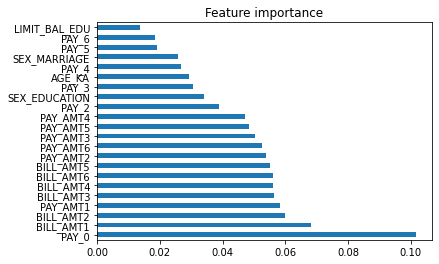

In [284]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.title('Feature importance')
plt.show()

In [285]:
 from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def auc_score(model, X_test, y_test):
  probs = model.predict_proba(X_test)[:,1] 
  auc = roc_auc_score(y_test, probs)
  fpr, tpr, _ = roc_curve(y_test, probs)
  return fpr, tpr, auc

In [286]:
auc_score_lda = auc_score(models[0], X_test, y_test)
auc_score_xgboost = auc_score(models[1], X_test, y_test)
auc_score_decision_tree = auc_score(models[2], X_test, y_test)
auc_score_random_forest = auc_score(models[3], X_test, y_test)
auc_score_neural_network = auc_score(models[4], X_test, y_test)

W celu oszacowania wpływu zmiennych, stwórzmy model testowy

In [287]:
def create_report(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  
  accuracy = round(accuracy_score(y_test, y_pred), 2)
  f1 = round(f1_score(y_true = y_test, y_pred = y_pred), 2)
  auc = round(roc_auc_score(y_test, y_pred), 2)
  
  print('Accuracy: ' + str(accuracy))
  print('F1 score: ' + str(f1))
  print('AUC score: ' + str(auc))

  return accuracy, f1, auc

Obliczanie metryk

In [288]:
print('# LDA #')
report_lda = create_report(models[0], X_test, y_test)
print()
print('# XGBOOST #')
report_xgboost = create_report(models[1], X_test, y_test)
print()
print('# Decision tree #')
report_desion_tree = create_report(models[2], X_test, y_test) 
print()
print('# Random forest #')
report_random_forest = create_report(models[3], X_test, y_test)
print()
print('# Neural network #')
report_neural_network = create_report(models[4], X_test, y_test)

# LDA #
Accuracy: 0.82
F1 score: 0.37
AUC score: 0.61

# XGBOOST #
Accuracy: 0.83
F1 score: 0.48
AUC score: 0.66

# Decision tree #
Accuracy: 0.83
F1 score: 0.46
AUC score: 0.65

# Random forest #
Accuracy: 0.82
F1 score: 0.42
AUC score: 0.63

# Neural network #
Accuracy: 0.82
F1 score: 0.48
AUC score: 0.66


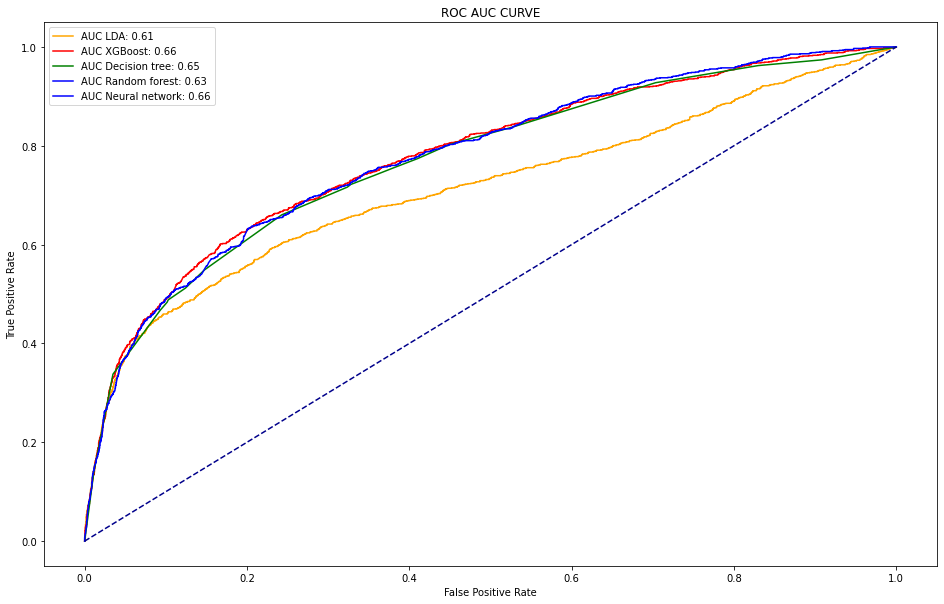

In [289]:
 plt.figure(figsize=(16,10))
 plt.plot(auc_score_lda[0], auc_score_lda[1], color='orange',
         label=f'AUC LDA: {report_lda[2]}')

plt.plot(auc_score_xgboost[0], auc_score_xgboost[1], color='red',
         label=f'AUC XGBoost: {report_xgboost[2]}')

plt.plot(auc_score_decision_tree[0], auc_score_decision_tree[1], color='green',
         label=f'AUC Decision tree: {report_desion_tree[2]}')

plt.plot(auc_score_random_forest[0], auc_score_random_forest[1], color='blue',
         label=f'AUC Random forest: {report_random_forest[2]}')

plt.plot(report_neural_network[0], report_neural_network[1], color='blue',
         label=f'AUC Neural network: {report_neural_network[2]}')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC CURVE')
plt.legend()

#4. **Dyskusja**

Po uzyskaniu wyników i przedstawieniu różnych wykresów, możemy stwierdzić i ocenić, który z modeli okazał się bardziej skuteczny w klasyfikacji binarnej. Do oceny modeli z małą nierównowagą klas, auc jest najlepszym rozwiązaniem, aby pokazać wyniki w bardziej przejrzysty sposób, ponieważ dokładność często daje 
błędne wyniki. 

Niestety model nie uległ dużej poprawie w wyniku wszystkich zmian, ale dwa typy modeli radziły sobie najlepiej: sieci neuronowe i xgboost. Wynik AUC wyniósł 0,66.